# Ejercicio 1


In [ ]:
#Generar una función y utilizar esta para recodificar la variable “país de
#origen” (1, 2, 3) en el dataframe a través de la función apply.

In [ ]:
#importamos las librerias necesarias para hacer cálculos, gráficas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import missingno as msno

In [ ]:
#cargamos la data desde nuestra PC
from google.colab import files
files.upload()

Saving autos.csv to autos.csv


{'autos.csv': b"Millas_Por_Galon;Cilindros;Pais_Origen;Peso_En_Libras;Desplazamiento;Aceleracion;Nombre;Anyo;Caballo_De_Fuerza\r\n18;8;USA;3504;307;12;chevrolet chevelle malibu;1/01/1970;130\r\n15;8;USA;3693;350;11.5;buick skylark 320;1/01/1970;165\r\n18;8;USA;3436;318;11;plymouth satellite;1/01/1970;150\r\n16;8;USA;3433;304;12;amc rebel sst;1/01/1970;150\r\n17;8;USA;3449;302;10.5;ford torino;1/01/1970;140\r\n15;8;USA;4341;429;10;ford galaxie 500;1/01/1970;198\r\n14;8;USA;4354;454;9;chevrolet impala;1/01/1970;220\r\n14;8;USA;4312;440;8.5;plymouth fury iii;1/01/1970;215\r\n14;8;USA;4425;455;10;pontiac catalina;1/01/1970;225\r\n15;8;USA;3850;390;8.5;amc ambassador dpl;1/01/1970;190\r\nNA;4;Europe;3090;133;17.5;citroen ds-21 pallas;1/01/1970;115\r\nNA;8;USA;4142;350;11.5;chevrolet chevelle concours (sw);1/01/1970;165\r\nNA;8;USA;4034;351;11;ford torino (sw);1/01/1970;153\r\nNA;8;USA;4166;383;10.5;plymouth satellite (sw);1/01/1970;175\r\nNA;8;USA;3850;360;11;amc rebel sst (sw);1/01/1970;17

In [68]:
#levantamos la data con pandas
df = pd.read_csv('autos.csv', sep=";")
DF=pd.DataFrame(df) #convertimos a un DataFrame
DF.head(11)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0
5,15.0,8,USA,4341,429.0,10.0,ford galaxie 500,1/01/1970,198.0
6,14.0,8,USA,4354,454.0,9.0,chevrolet impala,1/01/1970,220.0
7,14.0,8,USA,4312,440.0,8.5,plymouth fury iii,1/01/1970,215.0
8,14.0,8,USA,4425,455.0,10.0,pontiac catalina,1/01/1970,225.0
9,15.0,8,USA,3850,390.0,8.5,amc ambassador dpl,1/01/1970,190.0


In [86]:
DF.pivot_table(index = ['Pais_Origen'], aggfunc ='size') #Contamos cuantas repeticiones hay por cada valor de la columna 'Pais_Origen'

Pais_Origen
Europe     73
Japan      79
USA       254
dtype: int64

In [89]:
#Definimos una función que nos permite recodificar la columna 'Pais_Origen' donde para el valor 'USA' se tenga el valor '1', para 'Japan' sea '2' y para 'Europe' sea '3'
def f(row):
    if row['Pais_Origen']=="USA":
     return  1
    if row['Pais_Origen']=="Japan":
     return  2
    if row['Pais_Origen']=="Europe":
     return  3
    
DF['Pais_Origen'] = DF.apply(f,axis=1)
DF

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Columna Nueva,A
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,Medio,Ac.baja
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,Medio,Ac.baja
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,Medio,Ac.baja
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,Medio,Ac.baja
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0,Medio,Ac.baja
5,15.0,8,1,4341,429.0,10.0,ford galaxie 500,1/01/1970,198.0,Medio,Ac.baja
6,14.0,8,1,4354,454.0,9.0,chevrolet impala,1/01/1970,220.0,Medio,Ac.baja
7,14.0,8,1,4312,440.0,8.5,plymouth fury iii,1/01/1970,215.0,Medio,Ac.baja
8,14.0,8,1,4425,455.0,10.0,pontiac catalina,1/01/1970,225.0,Medio,Ac.baja
9,15.0,8,1,3850,390.0,8.5,amc ambassador dpl,1/01/1970,190.0,Medio,Ac.baja


# Ejercicio 2


In [ ]:
#Generar un Notebook Colab con código y resultados, que contiene
#información de autos de un periodo de tiempo. Resolver lo siguiente:
#Limpieza y tratamiento de las variables (Según corresponda)
#1. Log10(var1/var2)
#2. Sqrt(var1)*exp(var2)/200
#3. Si var 1 > var 2 → 5, caso contrario 3
#4. 1/logn(var1/var2)*100
#5. var2**2/var1


In [21]:
#Hacemos el cálculo de la varianza para las columnas especificadas 'Millas_Por_Galon' y 'Cilindros' del DataFrame
M=DF['Millas_Por_Galon'].var()
L=DF['Cilindros'].var()

In [26]:
#Creamos variables para los dos primeros cálculos con los cálculos realizados en la línea 21
L1=np.log10(M/L)
L2=(np.sqrt(M)*np.exp(L))/200

In [27]:
#Mostramos los primeros dos cálculos
print("El cálculo 2.1 es",L1)
print("El cálculo 2.2 es",L2)


El cálculo 2.1 es 1.3188788515711363
El cálculo 2.2 es 0.732966079082669


In [30]:
#Definimos una función que nos permita mostrar el valor de 5 para un valor de varianza1 mayor a la varianza2 y 3 para caso contrario 
def cond(a=None,b=None): 
 if M > L:
   return  5
 else:
   return  3
L3=cond(M,L)

In [31]:
#Mostramos el tecer cálculo
print("El cálculo 2.3 es:",L3)

El cálculo 2.3 es: 5


In [32]:
#Creamos variables para los últimos dos cálculos donde se utilice la varianza1 y varianza2
L4=(1/np.log(M/L))*100
L5=((L**2)/M)

In [33]:
print("El cálculo 2.4 es:",L4)
print("El cálculo 2.5 es",L5)

El cálculo 2.4 es: 32.9290655761059
El cálculo 2.5 es 0.14067264550977718


# Ejercicio 3


In [ ]:
#Crear una función que permita generar 3 variables cualitativas
#ordinales a partir de las variables numéricas con los siguientes criterios:
#★ Si es mayor a la “media + 1*desviación estándar” → Alto
#★ Si está entre “media - 1*desviación estándar” y “media +
#1*desviación estándar” → Medio
#★ Si es menor a la “media - 1*desviación estándar” → Bajo
#Nota: Mostrar con las nuevas variables generadas.
#Elegir con libertad las variables a trabajar.
#La función debe contar con su respectiva documentación.

In [90]:
#Definimos una función que nos permita mostrar un determinado valor dadas las siguientes condiciones
def f(DF):
   L=np.var(DF['Cilindros']) #Cálculo de la varianza de la columna 'Cilindros' del DataFrame
   K=np.mean(DF['Desplazamiento']) #Cálculo de la media de la columna 'Desplazamiento' del DataFrame
   J=np.std(DF['Peso_En_Libras']) #Cálculo de la desviación estandar de la columna 'Peso_En_Libras' del DataFrame
   for i in range(len(DF)): #Creamos un bucle que nos permite recorrer todo la longitud del DataFrame
    if L>K+J: #Si la la varianza de la columna 'Cilindros' es mayor que la suma de la media de la columna 'Desplazamiento' y la desviación estandar de la columna 'Peso_En_Libras'
     DF.loc[i,'Columna Nueva']='Alto' #Agregamos a una columna el valor 'Alto'
    elif K-J<L and L<K+J: #Si la varianza de la columna 'Cilindros' se encuentra entre la media de la columna 'Desplazamiento' menos la desviación estandar de la columna 'Peso_En_Libras' 
     DF.loc[i,'Columna Nueva']='Medio' #y la la suma de la media de la columna 'Desplazamiento' más la desviación estandar de la columna 'Peso_En_Libras' mostrar el valor 'Medio'
    else: #de otra forma (si la varianza de la columna 'Cilindros' es menor que la media de la columna 'Desplazamiento' menos la varianza de la columna 'Cilindros') mostrar el valor 'bajo'
     DF.loc[i,'Columna Nueva']='Bajo'
   return DF
DF2=f(DF)  #llamamos a la función
DF2

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Columna Nueva,A
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,Medio,Ac.baja
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,Medio,Ac.baja
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,Medio,Ac.baja
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,Medio,Ac.baja
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0,Medio,Ac.baja
5,15.0,8,1,4341,429.0,10.0,ford galaxie 500,1/01/1970,198.0,Medio,Ac.baja
6,14.0,8,1,4354,454.0,9.0,chevrolet impala,1/01/1970,220.0,Medio,Ac.baja
7,14.0,8,1,4312,440.0,8.5,plymouth fury iii,1/01/1970,215.0,Medio,Ac.baja
8,14.0,8,1,4425,455.0,10.0,pontiac catalina,1/01/1970,225.0,Medio,Ac.baja
9,15.0,8,1,3850,390.0,8.5,amc ambassador dpl,1/01/1970,190.0,Medio,Ac.baja


In [91]:
print(DF.pivot_table(index = ['Columna Nueva'], aggfunc ='size')) #Vemos cuantas veces se repite un valor de la Columna nueva creada

Columna Nueva
Medio    406
dtype: int64


# Ejercicio 4

In [92]:
#Crear una función que muestre los siguientes gráficos
#(simultáneamente) para las variables numéricas, según una variable
#cualitativa:
#❖ Cajas y bigotes
#❖ Barras de la media
#❖ Histograma con densidad (Curva)

In [93]:
pd.set_option('display.max_columns', None) #Usamos esto para mostrar todas las columnas del DataFrame
print(DF.head(7)) #Mostaos las primeras 7 filas del DataFrame

   Millas_Por_Galon  Cilindros  Pais_Origen  Peso_En_Libras  Desplazamiento  \
0              18.0          8            1            3504           307.0   
1              15.0          8            1            3693           350.0   
2              18.0          8            1            3436           318.0   
3              16.0          8            1            3433           304.0   
4              17.0          8            1            3449           302.0   
5              15.0          8            1            4341           429.0   
6              14.0          8            1            4354           454.0   

   Aceleracion                     Nombre       Anyo  Caballo_De_Fuerza  \
0         12.0  chevrolet chevelle malibu  1/01/1970              130.0   
1         11.5          buick skylark 320  1/01/1970              165.0   
2         11.0         plymouth satellite  1/01/1970              150.0   
3         12.0              amc rebel sst  1/01/1970              1

In [94]:
pd.set_option('display.max_rows', None) #Usamos esto para mostrar todas las columnas del DataFrame
print(DF.pivot_table(index = ['Aceleracion'], aggfunc ='size')) #Contamos cuantas veces se repite un determinado valor de acelaración en la columna 'Aceleración' para establecer 
#nueva variable cualitativa según un criterio

Aceleracion
8.0      2
8.5      2
9.0      1
9.5      2
10.0     4
10.5     2
11.0     9
11.1     1
11.2     1
11.3     1
11.4     2
11.5     8
11.6     1
12.0    10
12.1     1
12.2     2
12.5     8
12.6     2
12.8     3
12.9     2
13.0    12
13.2     6
13.4     2
13.5    15
13.6     2
13.7     2
13.8     2
13.9     2
14.0    16
14.1     1
14.2     3
14.3     2
14.4     5
14.5    23
14.7     5
14.8     3
14.9     7
15.0    14
15.1     2
15.2     3
15.3     3
15.4     5
15.5    21
15.6     1
15.7     4
15.8     7
15.9     2
16.0    16
16.1     1
16.2     4
16.4     9
16.5    13
16.6     3
16.7     3
16.8     2
16.9     4
17.0    14
17.1     1
17.2     2
17.3     5
17.4     2
17.5     5
17.6     4
17.7     3
17.8     2
17.9     1
18.0     8
18.1     1
18.2     5
18.3     1
18.5     5
18.6     4
18.7     2
18.8     1
19.0    12
19.2     3
19.4     3
19.5     6
19.6     2
19.9     1
20.0     1
20.1     2
20.4     1
20.5     3
20.7     1
21.0     5
21.5     1
21.7     1
21.8     1
21.9     

In [95]:
#Observamos que los valores de aceleración varia entre 8 a 24 
#Entonces estableceos que de 8 a 13 sea aceleracion baja, de 13 a 18 sea aceleracion media y de 18 a 24 sea aceleracion alta mediante la siguiente función 
#y la agregamos a una columna llamada 'A'
def f(row):
    if 8.0<=row['Aceleracion']<=13.0:
     return  'Ac.baja'
    elif 13.0<row['Aceleracion']<=18.0:
     return  'Ac. media'
    else:
     return 'Ac. alta'
    
DF['A'] = DF.apply(f,axis=1)
DF

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Columna Nueva,A
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,Medio,Ac.baja
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,Medio,Ac.baja
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,Medio,Ac.baja
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,Medio,Ac.baja
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0,Medio,Ac.baja
5,15.0,8,1,4341,429.0,10.0,ford galaxie 500,1/01/1970,198.0,Medio,Ac.baja
6,14.0,8,1,4354,454.0,9.0,chevrolet impala,1/01/1970,220.0,Medio,Ac.baja
7,14.0,8,1,4312,440.0,8.5,plymouth fury iii,1/01/1970,215.0,Medio,Ac.baja
8,14.0,8,1,4425,455.0,10.0,pontiac catalina,1/01/1970,225.0,Medio,Ac.baja
9,15.0,8,1,3850,390.0,8.5,amc ambassador dpl,1/01/1970,190.0,Medio,Ac.baja


In [97]:
pd.set_option('display.max_rows', None) #Mostramos todas las filas
print(DF.pivot_table(index = ['A'], aggfunc ='size')) # Contamos cuantas veces se repite cada valor de la columna 'A'
print(DF.pivot_table(index = ['Pais_Origen'], aggfunc ='size')) ## Contamos cuantas veces se repite cada valor de la columna 'Pais_Origen'

A
Ac. alta      70
Ac. media    260
Ac.baja       76
dtype: int64
Pais_Origen
1    254
2     79
3     73
dtype: int64


In [98]:
#Definimos una función que muestre tres tipos de gráficos simultáneamente según el criterio en la línea 95
def graf(DF,  x:float, y:float, title): #Definimos la función con cuatro parametros
    fig, axs = plt.subplots(ncols=3, figsize=(15,7)) #Establecemos la posición y tamaño de las gráficas 

    # Gráfico de cajas y bigotes
    sns.boxplot(x= 'Pais_Origen', y='Peso_En_Libras', data=DF, ax=axs[0])
    axs[0].set_title("Gráfico de cajas")  #Nombre de este gráfico en particular

    # Gráfico de barras de la media
    sns.barplot(x= 'Pais_Origen', y='Aceleracion', data=DF, ax=axs[1])
    axs[1].set_title("Gráfico de barras") #Nombre de este gráfico en particular

    # Gráfico de histograma con densidad
    sns.histplot(data=DF, x= 'Pais_Origen',hue='A', kde=True, ax=axs[2])
    axs[2].set_title("Histograma con densidad(curva)")  #Nombre de este gráfico en particular

    fig.suptitle(title) #Nombre de los 3 gráficos en simultáneo
    plt.show()

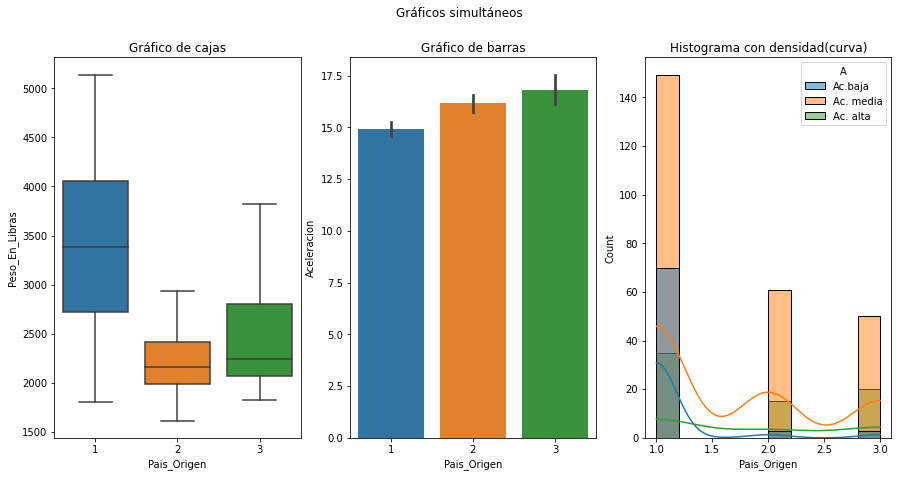

None


In [99]:
Graficos=graf(DF, 'categoria', 'variable_numerica', 'Gráficos simultáneos')
print(Graficos)

# Ejercicio 5

In [100]:
#Crear una función que devuelva un mapa de calor con la correlación
#de todas las variables numéricas (incluye las generadas), para cada
#país.


In [142]:
M=DF['Millas_Por_Galon'].var()
L=DF['Cilindros'].var()
DF['Columna 1']= L1  #1. Log10(var1/var2) 
DF['Columna 2']= L2  #2. Sqrt(var1)*exp(var2)/200
DF['Columna 3']= L3  #3. Si var 1 > var 2 → 5, caso contrario 3
DF['Columna 4']= L4  #4. 1/logn(var1/var2)*100
DF['Columna 5']= L5  #5. var2**2/var1
DF

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Columna Nueva,A,Columna 1,Columna 2,Columna 3,Columna 4,Columna 5
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,Medio,Ac.baja,1.318879,0.732966,5,32.929066,0.140673
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,Medio,Ac.baja,1.318879,0.732966,5,32.929066,0.140673
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,Medio,Ac.baja,1.318879,0.732966,5,32.929066,0.140673
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,Medio,Ac.baja,1.318879,0.732966,5,32.929066,0.140673
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0,Medio,Ac.baja,1.318879,0.732966,5,32.929066,0.140673
5,15.0,8,1,4341,429.0,10.0,ford galaxie 500,1/01/1970,198.0,Medio,Ac.baja,1.318879,0.732966,5,32.929066,0.140673
6,14.0,8,1,4354,454.0,9.0,chevrolet impala,1/01/1970,220.0,Medio,Ac.baja,1.318879,0.732966,5,32.929066,0.140673
7,14.0,8,1,4312,440.0,8.5,plymouth fury iii,1/01/1970,215.0,Medio,Ac.baja,1.318879,0.732966,5,32.929066,0.140673
8,14.0,8,1,4425,455.0,10.0,pontiac catalina,1/01/1970,225.0,Medio,Ac.baja,1.318879,0.732966,5,32.929066,0.140673
9,15.0,8,1,3850,390.0,8.5,amc ambassador dpl,1/01/1970,190.0,Medio,Ac.baja,1.318879,0.732966,5,32.929066,0.140673


In [172]:
#Definimos una función que muestre lo siguiente:
#Gráficos de mapa de calor con la correlación de todas las variables numéricas para cada país

def graf1(DF,x:float, y:float):
#------------------------------------------------------------------------------------------------------------
    DFIL1=DF.loc[DF['Pais_Origen'] == 1]#para la columa 'Pais_Origen' con valores 'USA'

    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Columna 3',y='Columna 4',cmap='hot',kind='hex',data=DFIL1)
  
#------------------------------------------------------------------------------------------------------------
    DFIL2=DF.loc[DF['Pais_Origen'] == 2]#para la columa 'Pais_Origen' con valores 'Japan'

    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Columna 3',y='Columna 4',cmap='hot',kind='hex',data=DFIL2)
#------------------------------------------------------------------------------------------------------------
    DFIL3=DF.loc[DF['Pais_Origen'] == 3]#para la columa 'Pais_Origen' con valores 'Europe'

    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Columna 3',y='Columna 4',cmap='hot',kind='hex',data=DFIL3)
  
#------------------------------------------------------------------------------------------------------------
    DFIL4=DF.loc[DF['A'] == 'Ac. media']#para la columa 'A' con valor ''Ac. media'
    ## Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Millas_Por_Galon',y='Cilindros',cmap='hot',kind='hex',data=DFIL4)

    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Cilindros',y='Peso_En_Libras',cmap='hot',kind='hex',data=DFIL4)

    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Peso_En_Libras',y='Desplazamiento',cmap='hot',kind='hex',data=DFIL4)
    
    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Desplazamiento',y='Aceleracion',cmap='hot',kind='hex',data=DFIL4)
#------------------------------------------------------------------------------------------------------------
    DFIL5=DF.loc[DF['Pais_Origen'] == 1]#para la columa 'Pais_Origen' con valores 'USA'
    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Millas_Por_Galon',y='Cilindros',cmap='hot',kind='hex',data=DFIL5)

    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Cilindros',y='Peso_En_Libras',cmap='hot',kind='hex',data=DFIL5)

    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Peso_En_Libras',y='Desplazamiento',cmap='hot',kind='hex',data=DFIL5)
    
    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Desplazamiento',y='Aceleracion',cmap='hot',kind='hex',data=DFIL5)

#------------------------------------------------------------------------------------------------------------

    DFIL6=DF.loc[DF['Pais_Origen'] == 2]#para la columa 'Pais_Origen' con valores 'Japan'
    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Millas_Por_Galon',y='Cilindros',cmap='hot',kind='hex',data=DFIL6)
  

    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Cilindros',y='Peso_En_Libras',cmap='hot',kind='hex',data=DFIL6)
   

    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Peso_En_Libras',y='Desplazamiento',cmap='hot',kind='hex',data=DFIL6)
    
    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Desplazamiento',y='Aceleracion',cmap='hot',kind='hex',data=DFIL6)

#------------------------------------------------------------------------------------------------------------

    DFIL7=DF.loc[DF['Pais_Origen'] == 3] #para la columa 'Pais_Origen' con valores 'Europe'
    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Millas_Por_Galon',y='Cilindros',cmap='hot',kind='hex',data=DFIL7)
  

    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Cilindros',y='Peso_En_Libras',cmap='hot',kind='hex',data=DFIL7)
   

    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Peso_En_Libras',y='Desplazamiento',cmap='hot',kind='hex',data=DFIL7)
    
    # Mapa de calor con variables numéricas de columnas
    sns.jointplot(x='Desplazamiento',y='Aceleracion',cmap='hot',kind='hex',data=DFIL7)
  
  
  
    plt.show()


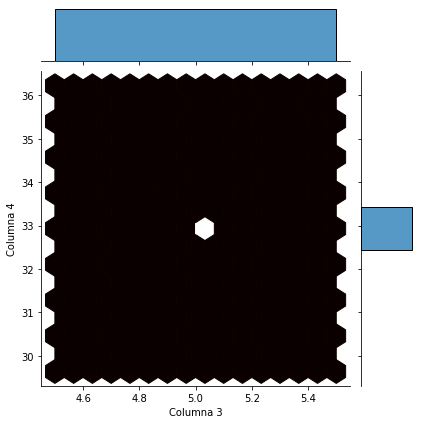

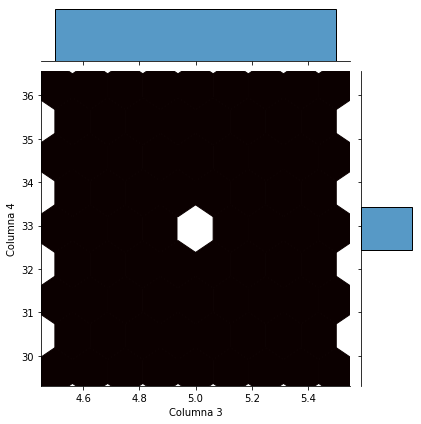

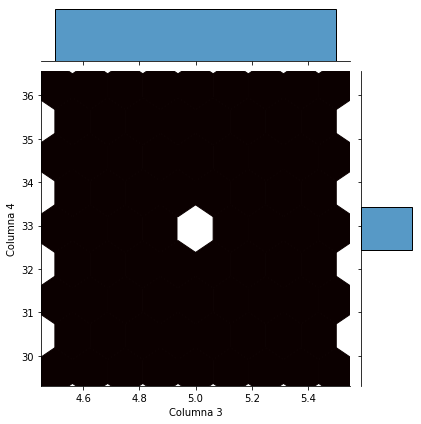

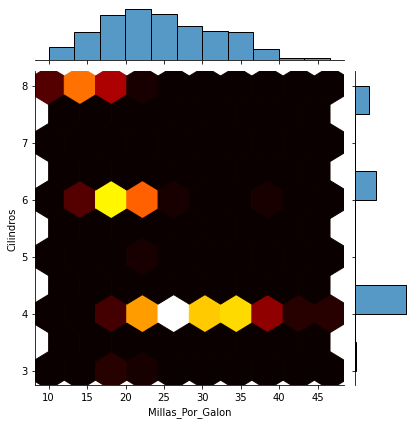

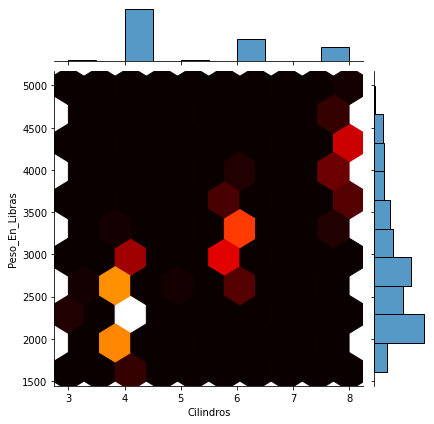

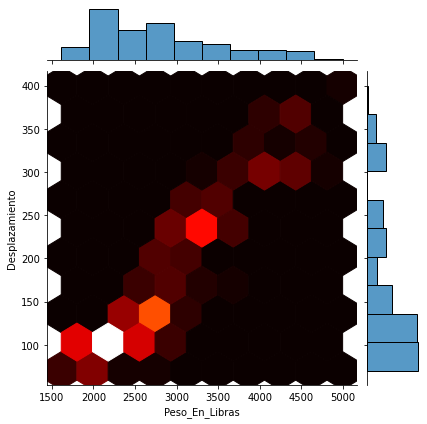

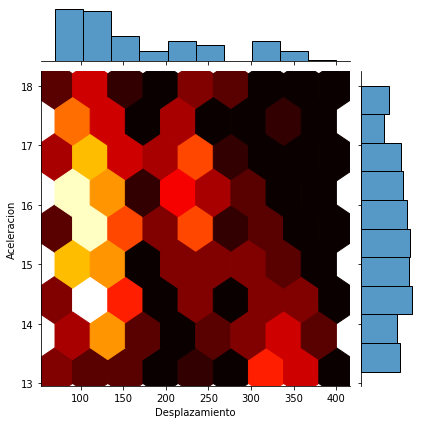

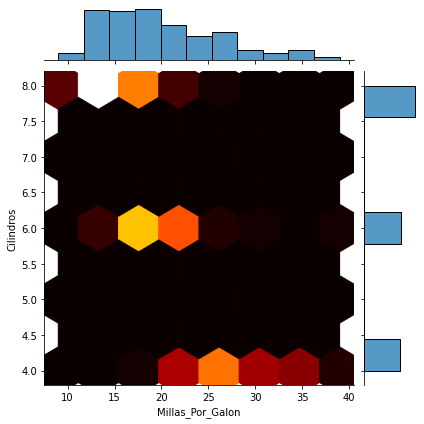

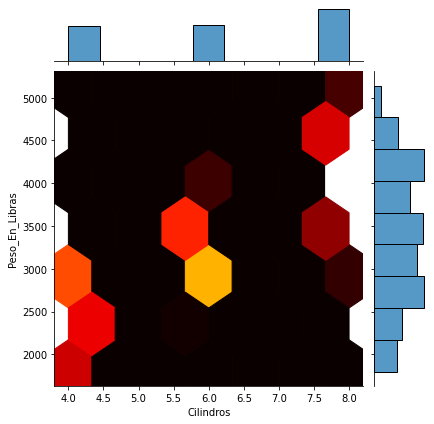

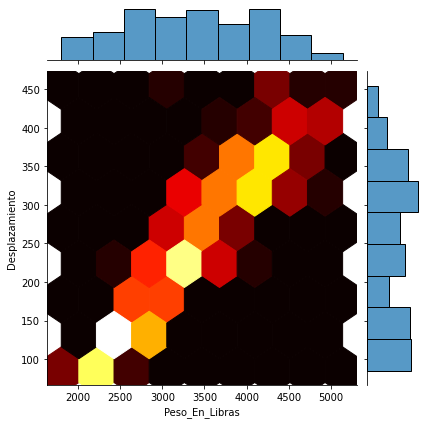

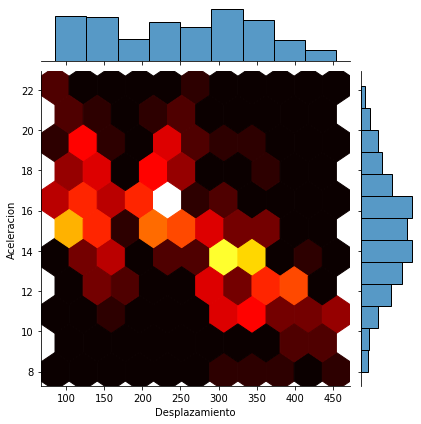

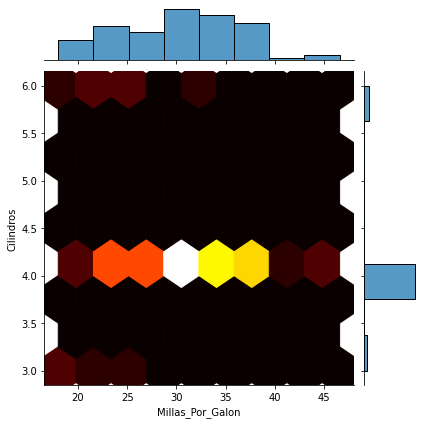

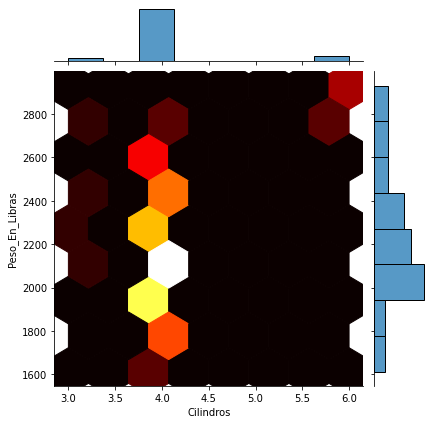

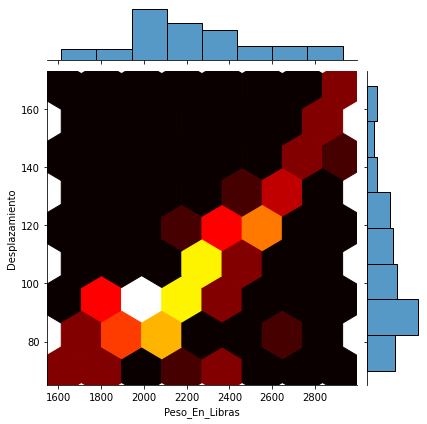

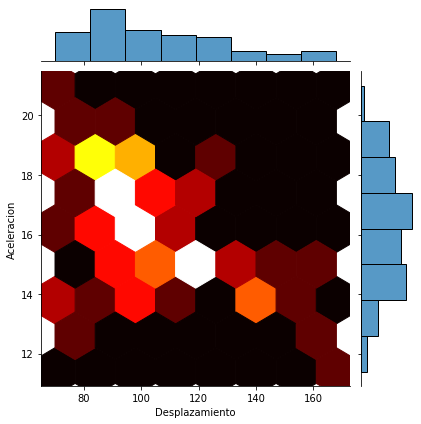

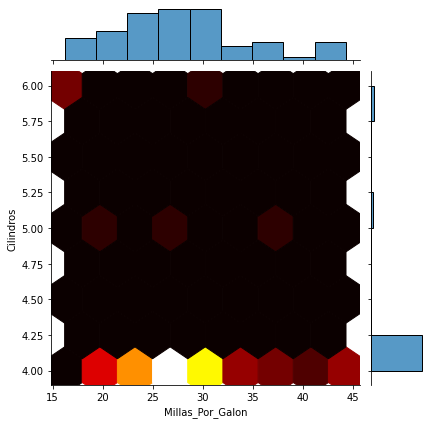

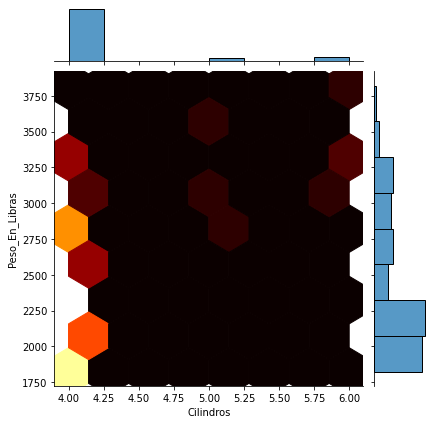

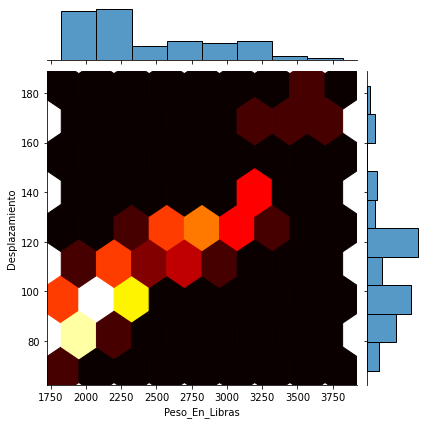

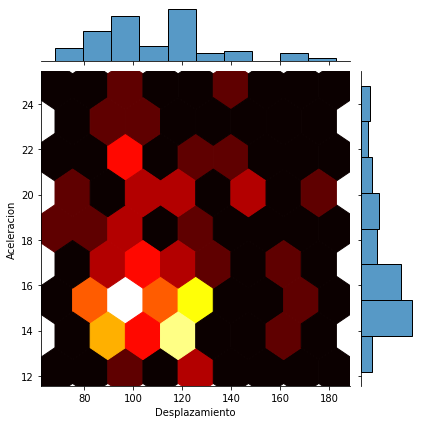

In [173]:
# Llamar a la función graf
graf1(DF,'Variable numerica en x','Variable numerica en y')
